بارگذاری مدل‌ها...

===== test8.jpg =====


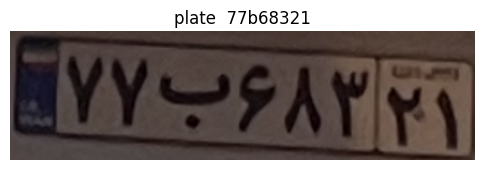

  خام: sevensevenBsixeightthreetwoone
  نهایی: 77b68321
  (8 کاراکتر)

===== test15.jpg =====


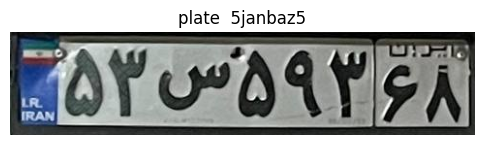

  خام: fiveJanbazfivethreesixeight
  نهایی: 5janbaz5
  (6 کاراکتر)

===== test17.jpg =====


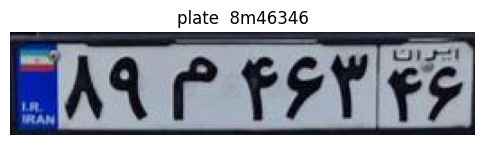

  خام: eightMfoursixthreefoursix
  نهایی: 8m46346
  (7 کاراکتر)

تموم شد!


In [28]:
import cv2
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt

# تنظیمات
PLATE_MODEL = "models/best.pt"
CHAR_MODEL  = "models/plate.pt"

CONF_PLATE = 0.70
CONF_CHAR  = 0.45

CROP_DIR = Path("plate_crops")

IMAGES = [
    "photos/test8.jpg",

    "photos/test15.jpg",
    "photos/test17.jpg",

]

# نقشه کلمات به رقم
WORD_TO_CHAR = {
    'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
    'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9',
    'b': 'b',  # اگر B بزرگ بود می‌تونی 'B':'B' بذاری
    # حروف دیگه رو اضافه کن اگر لازم بود
}


def convert_to_digits(raw):
    text = raw.lower()
    result = []
    i = 0
    while i < len(text):
        matched = False
        for word, char in sorted(WORD_TO_CHAR.items(), key=lambda x: len(x[0]), reverse=True):
            if text.startswith(word, i):
                result.append(char)
                i += len(word)
                matched = True
                break
        if not matched:
            result.append(text[i])
            i += 1
    final = ''.join(result)
    # حذف کاراکتر اضافی اگر بیشتر از ۸ تا شد
    if len(final) > 8:
        final = final[:8]
    return final


def main():
    CROP_DIR.mkdir(parents=True, exist_ok=True)

    print("بارگذاری مدل‌ها...")
    plate_model = YOLO(PLATE_MODEL)
    char_model = YOLO(CHAR_MODEL)

    for img_str in IMAGES:
        img_path = Path(img_str)
        if not img_path.exists():
            continue

        print(f"\n===== {img_path.name} =====")

        results = plate_model(img_path, verbose=False)[0]
        img = cv2.imread(str(img_path))
        if img is None:
            continue

        plates = [b for b in results.boxes if float(b.conf) >= CONF_PLATE]
        if not plates:
            print("پلاکی پیدا نشد")
            continue

        for i, box in enumerate(plates, 1):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf)

            crop = img[y1:y2, x1:x2]
            if crop.shape[0] < 30 or crop.shape[1] < 80:
                continue

            name = f"{img_path.stem}_plate{i}_c{int(conf*100)}.jpg"
            path = CROP_DIR / name
            cv2.imwrite(str(path), crop)

            # plt.figure(figsize=(6, 4))
            # plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            # plt.axis('off')
            # plt.title(f"plate")
            # plt.show()

            char_res = char_model(path, verbose=False)[0]

            chars = []
            for b in char_res.boxes:
                if float(b.conf) < CONF_CHAR:
                    continue
                name = char_res.names[int(b.cls)]
                chars.append((b.xyxy[0], name))

            if not chars:
                continue

            # مرتب‌سازی چپ به راست
            sorted_chars = sorted(chars, key=lambda t: t[0][0])

            # حذف کاراکترهای خیلی نزدیک (مثل تکراری)
            final_chars = []
            last_x = -1000
            for box, name in sorted_chars:
                curr_x = box[0]
                if curr_x - last_x > 15:  # حداقل فاصله ۱۵ پیکسل
                    final_chars.append(name)
                    last_x = curr_x

            raw = ''.join(final_chars)
            final = convert_to_digits(raw)



            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"plate  {final}")
            plt.show()

            print(f"  خام: {raw}")
            print(f"  نهایی: {final}")
            print(f"  ({len(final_chars)} کاراکتر)")

            try:
                new_name = f"{img_path.stem}_plate{i}_{final}.jpg"
                path.rename(CROP_DIR / new_name)
                print(f"     → تغییر نام: {new_name}")
            except:
                pass

    print("\nتموم شد!")


if __name__ == "__main__":
    main()

بارگذاری مدل‌ها...

===== test8.jpg =====


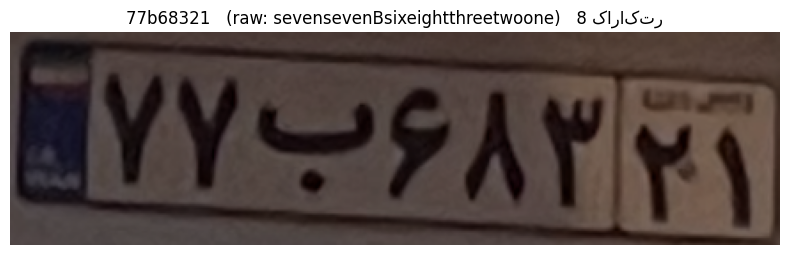

  خام       : sevensevenBsixeightthreetwoone
  نهایی      : 77b68321
  کاراکترها  : 8
  اطمینان پلاک: 0.760
  تغییر نام ناموفق: [WinError 183] Cannot create a file when that file already exists: 'plate_crops\\test8_plate1_c075.jpg' -> 'plate_crops\\test8_plate1_77b68321.jpg'

===== test17.jpg =====


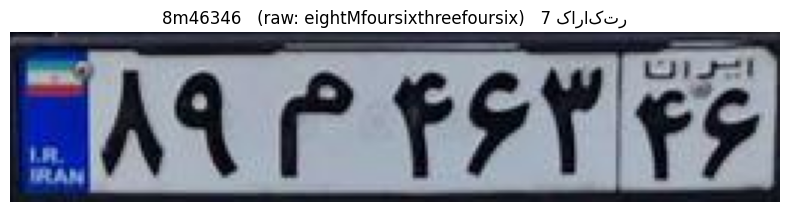

  خام       : eightMfoursixthreefoursix
  نهایی      : 8m46346
  کاراکترها  : 7
  اطمینان پلاک: 0.763
  تغییر نام ناموفق: [WinError 183] Cannot create a file when that file already exists: 'plate_crops\\test17_plate1_c076.jpg' -> 'plate_crops\\test17_plate1_8m46346.jpg'
فایل پیدا نشد: photos\test18.jpg

پردازش تمام شد ✓



In [41]:
import cv2
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
# ************************************************************************************************************************************************
# ─── تنظیمات ────────────────────────────────────────────────────────────────
PLATE_MODEL = "models/best.pt"
CHAR_MODEL  = "models/plate.pt"

CONF_PLATE = 0.68
CONF_CHAR  = 0.48

CROP_DIR = Path("plate_crops")
CROP_DIR.mkdir(parents=True, exist_ok=True)

IMAGES = [
    "photos/test8.jpg",
    # "photos/test15.jpg",
    "photos/test17.jpg",
     "photos/test18.jpg",  # اضافه کن برای تست بیشتر
]

# نقشه کلمات به کاراکتر (برای مدل‌هایی که گاهی کلمه می‌دن)
WORD_TO_CHAR = {
    'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
    'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9',
    # 'o': '0', 'z': '2', 's': '5',           # اشتباهات رایج OCR
    # 'b': 'b', 'p': 'b', 'd': 'd', 'q': 'd',  # حروف مشابه
    # اگر مدلت حروف فارسی هم تشخیص می‌ده، اینجا اضافه کن
}

def convert_to_digits(raw_text):
    """تبدیل خروجی OCR به رشته تمیز شماره پلاک"""
    text = raw_text.lower().strip()
    result = []
    i = 0
    while i < len(text):
        matched = False
        # اولویت با رشته‌های بلندتر
        for word, char in sorted(WORD_TO_CHAR.items(), key=lambda x: len(x[0]), reverse=True):
            if text.startswith(word, i):
                result.append(char)
                i += len(word)
                matched = True
                break
        if not matched:
            result.append(text[i])
            i += 1

    final = ''.join(result)
    # معمولاً پلاک ایرانی بیشتر از ۸ کاراکتر معنادار نیست
    return final[:8]


def filter_and_sort_chars(char_detections, min_center_dist_ratio=0.038):
    """
    فیلتر و مرتب‌سازی کاراکترها با فاصله دینامیک نسبت به عرض کراپ
    """
    if not char_detections:
        return []

    # مرکز x هر باکس
    with_center = [
        ((box[0] + box[2]) / 2, box, name)
        for box, name in char_detections
    ]

    # مرتب‌سازی بر اساس مرکز x
    with_center.sort(key=lambda x: x[0])

    filtered = []
    last_center = -10000

    # عرض تقریبی کراپ (برای محاسبه فاصله دینامیک)
    if len(char_detections) > 0:
        crop_width = char_detections[0][0][2] - char_detections[0][0][0]  # تقریبی
        min_dist = crop_width * min_center_dist_ratio
    else:
        min_dist = 16  # fallback

    for center_x, box, name in with_center:
        if center_x - last_center >= min_dist:
            filtered.append((box, name))
            last_center = center_x

    return filtered


def main():
    print("بارگذاری مدل‌ها...")
    plate_model = YOLO(PLATE_MODEL)
    char_model = YOLO(CHAR_MODEL)

    for img_str in IMAGES:
        img_path = Path(img_str)
        if not img_path.exists():
            print(f"فایل پیدا نشد: {img_path}")
            continue

        print(f"\n===== {img_path.name} =====")

        # تشخیص پلاک
        results = plate_model(img_path, verbose=False)[0]
        img = cv2.imread(str(img_path))
        if img is None:
            print("نمی‌تونم عکس رو بخونم!")
            continue

        plates = [b for b in results.boxes if float(b.conf) >= CONF_PLATE]

        if not plates:
            print("هیچ پلاکی با اطمینان کافی پیدا نشد")
            continue

        for i, box in enumerate(plates, 1):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf)

            crop = img[y1:y2, x1:x2]
            if crop.shape[0] < 35 or crop.shape[1] < 90:
                print(f"پلاک {i} خیلی کوچیکه → رد شد")
                continue

            # ذخیره موقت کراپ
            name = f"{img_path.stem}_plate{i}_c{int(conf*100):03d}.jpg"
            temp_path = CROP_DIR / name
            cv2.imwrite(str(temp_path), crop)

            # تشخیص کاراکترها
            char_res = char_model(temp_path, verbose=False)[0]

            chars = []
            for b in char_res.boxes:
                if float(b.conf) < CONF_CHAR:
                    continue
                cls_name = char_res.names[int(b.cls)]
                box_xyxy = b.xyxy[0].cpu().numpy().astype(int)  # [x1,y1,x2,y2]
                chars.append((box_xyxy, cls_name))

            if len(chars) < 3:
                print(f"پلاک {i} → تعداد کاراکتر خیلی کم ({len(chars)})")
                continue

            # فیلتر + مرتب‌سازی بهبودیافته
            filtered_chars = filter_and_sort_chars(chars, min_center_dist_ratio=0.038)

            if len(filtered_chars) < 3:
                print(f"پلاک {i} → بعد از فیلتر تعداد کاراکتر کم شد ({len(filtered_chars)})")
                continue

            sorted_names = [name for _, name in filtered_chars]
            raw = ''.join(sorted_names)
            final = convert_to_digits(raw)

            # نمایش نتیجه
            plt.figure(figsize=(8, 3))
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"{final}   (raw: {raw})   {len(filtered_chars)} کاراکتر")
            plt.tight_layout()
            plt.show()

            print(f"  خام       : {raw}")
            print(f"  نهایی      : {final}")
            print(f"  کاراکترها  : {len(filtered_chars)}")
            print(f"  اطمینان پلاک: {conf:.3f}")

            # تغییر نام فایل به نتیجه نهایی
            try:
                new_name = f"{img_path.stem}_plate{i}_{final}.jpg"
                temp_path.rename(CROP_DIR / new_name)
                print(f"  → تغییر نام به: {new_name}")
            except Exception as e:
                print(f"  تغییر نام ناموفق: {e}")

    print("\nپردازش تمام شد ✓\n")


if __name__ == "__main__":
    main()

Loading models...

===== Processing: test8.jpg =====


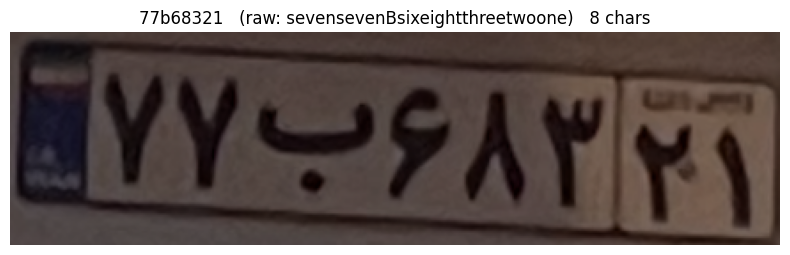

  Raw classes : sevensevenBsixeightthreetwoone
  Mapped text : 77b68321
  Final plate : 77b68321
  Char count  : 8
  Plate conf  : 0.760
  → Rename failed: [WinError 183] Cannot create a file when that file already exists: 'plate_crops\\test8_plate1_c075.jpg' -> 'plate_crops\\test8_plate1_77b68321.jpg'

===== Processing: test17.jpg =====


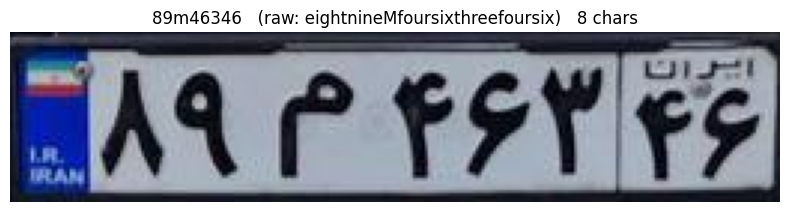

  Raw classes : eightnineMfoursixthreefoursix
  Mapped text : 89m46346
  Final plate : 89m46346
  Char count  : 8
  Plate conf  : 0.763
  → Rename failed: [WinError 183] Cannot create a file when that file already exists: 'plate_crops\\test17_plate1_c076.jpg' -> 'plate_crops\\test17_plate1_89m46346.jpg'

===== Processing: test18.jpg =====


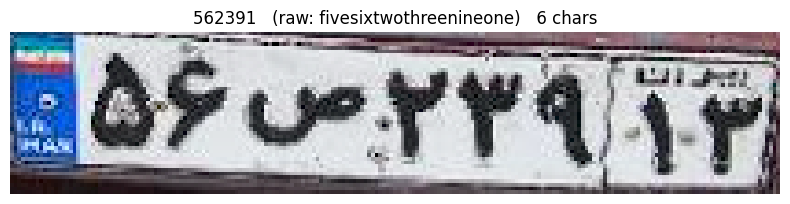

  Raw classes : fivesixtwothreenineone
  Mapped text : 562391
  Final plate : 562391
  Char count  : 6
  Plate conf  : 0.689
  → Rename failed: [WinError 183] Cannot create a file when that file already exists: 'plate_crops\\test18_plate1_c068.jpg' -> 'plate_crops\\test18_plate1_562391.jpg'

===== Processing: test19.jpg =====


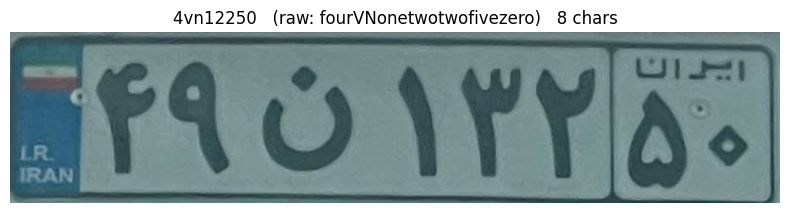

  Raw classes : fourVNonetwotwofivezero
  Mapped text : 4vn12250
  Final plate : 4vn12250
  Char count  : 8
  Plate conf  : 0.671
  → Rename failed: [WinError 183] Cannot create a file when that file already exists: 'plate_crops\\test19_plate1_c067.jpg' -> 'plate_crops\\test19_plate1_4vn12250.jpg'

Processing complete ✓



In [49]:
import cv2
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# ************************************************************************************************************************************************
# ─── Configuration ──────────────────────────────────────────────────────────────
PLATE_MODEL = "models/best.pt"
CHAR_MODEL = "models/plate.pt"

CONF_PLATE = 0.55
CONF_CHAR = 0.35

CROP_DIR = Path("plate_crops")
CROP_DIR.mkdir(parents=True, exist_ok=True)

IMAGES = [
    "photos/test8.jpg",
    # "photos/test16.jpg",
    "photos/test17.jpg",
    "photos/test18.jpg",  # Add more for testing
    "photos/test19.jpg",
]

# Mapping YOLO class names to actual license plate characters
CLASS_TO_CHAR = {
    # Numbers as words
    'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
    'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9',

    # Persian letters (mapped from your model's class names)
    'Alef': 'alef',
    'Ayn': 'ayn',
    'B': 'b',
    'D': 'd',
    'Gh': 'gh',      # likely represents 'ghaf' (ق)
    'J': 'j',
    'Janbaz': 'janbaz',
    'L': 'l',
    'M': 'm',
    'N': 'n',
    'Sad': 'sad',
    'Sin': 'sin',
    'Ta': 'ta',
    'Te': 'te',
    'V': 'v',
    'i': 'y',        # 'i' likely means 'ye' (ی)

    # Common OCR-like mistakes (optional)
    # 'o': '0', 's': '5', 'z': '2',
}

# Valid characters for Iranian license plates (only alphanumeric in Latin for output)
VALID_CHARS = set('0123456789abcdefghijklmnopqrstuvwxyz')


def map_class_names_to_text(class_list):
    """
    Convert list of YOLO class names (e.g., ['eight', 'M', 'four'])
    to a clean string using CLASS_TO_CHAR mapping.
    Unmapped classes are skipped.
    """
    result = []
    for cls in class_list:
        char = CLASS_TO_CHAR.get(cls, None)
        if char is not None:
            result.append(char)
        # Optional: if you want to keep unknown classes, uncomment next line:
        # else: result.append(cls.lower())
    return ''.join(result)


def filter_and_sort_chars(char_detections, min_center_dist_ratio=0.038):
    """
    Filter and sort detected characters left-to-right based on dynamic spacing.
    """
    if not char_detections:
        return []

    # Compute x-centers
    with_center = [
        ((box[0] + box[2]) / 2, box, name)
        for box, name in char_detections
    ]
    with_center.sort(key=lambda x: x[0])

    filtered = []
    last_center = -10000

    # Estimate crop width from first detection
    if char_detections:
        crop_width = char_detections[0][0][2] - char_detections[0][0][0]
        min_dist = crop_width * min_center_dist_ratio
    else:
        min_dist = 16

    for center_x, box, name in with_center:
        if center_x - last_center >= min_dist:
            filtered.append((box, name))
            last_center = center_x

    return filtered


def main():
    print("Loading models...")
    plate_model = YOLO(PLATE_MODEL)
    char_model = YOLO(CHAR_MODEL)

    for img_str in IMAGES:
        img_path = Path(img_str)
        if not img_path.exists():
            print(f"File not found: {img_path}")
            continue

        print(f"\n===== Processing: {img_path.name} =====")

        # Detect license plates
        results = plate_model(img_path, verbose=False)[0]
        img = cv2.imread(str(img_path))
        if img is None:
            print("Failed to read image!")
            continue

        plates = [b for b in results.boxes if float(b.conf) >= CONF_PLATE]

        if not plates:
            print("No plate detected with sufficient confidence.")
            continue

        for i, box in enumerate(plates, 1):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf)

            crop = img[y1:y2, x1:x2]
            if crop.shape[0] < 35 or crop.shape[1] < 90:
                print(f"Plate {i} too small → skipped")
                continue

            # Save temporary crop (required for YOLO char model in this version)
            name = f"{img_path.stem}_plate{i}_c{int(conf*100):03d}.jpg"
            temp_path = CROP_DIR / name
            cv2.imwrite(str(temp_path), crop)

            # Detect characters
            char_res = char_model(temp_path, verbose=False)[0]

            chars = []
            for b in char_res.boxes:
                if float(b.conf) < CONF_CHAR:
                    continue
                cls_name = char_res.names[int(b.cls)]
                box_xyxy = b.xyxy[0].cpu().numpy().astype(int)
                chars.append((box_xyxy, cls_name))

            if len(chars) < 3:
                print(f"Plate {i} → too few characters ({len(chars)})")
                continue

            # Filter and sort
            filtered_chars = filter_and_sort_chars(chars, min_center_dist_ratio=0.038)

            if len(filtered_chars) < 3:
                print(f"Plate {i} → too few after filtering ({len(filtered_chars)})")
                continue

            # Convert class names to readable text
            class_names = [name for _, name in filtered_chars]
            raw = ''.join(class_names)
            mapped = map_class_names_to_text(class_names)
            # Keep only valid alphanumeric characters (for clean output)
            final = ''.join(c for c in mapped if c in VALID_CHARS)[:8]

            # Display result
            plt.figure(figsize=(8, 3))
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"{final}   (raw: {raw})   {len(filtered_chars)} chars")
            plt.tight_layout()
            plt.show()

            print(f"  Raw classes : {raw}")
            print(f"  Mapped text : {mapped}")
            print(f"  Final plate : {final}")
            print(f"  Char count  : {len(filtered_chars)}")
            print(f"  Plate conf  : {conf:.3f}")

            # Rename file to final result
            try:
                safe_final = "".join(c if c.isalnum() else "_" for c in final)
                new_name = f"{img_path.stem}_plate{i}_{safe_final}.jpg"
                temp_path.rename(CROP_DIR / new_name)
                print(f"  → Renamed to: {new_name}")
            except Exception as e:
                print(f"  → Rename failed: {e}")

    print("\nProcessing complete ✓\n")


if __name__ == "__main__":
    main()

Loading models...

===== Processing: test8.jpg =====


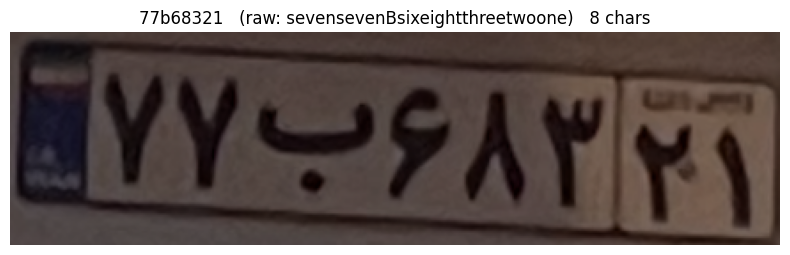

  Raw classes : sevensevenBsixeightthreetwoone
  Mapped text : 77b68321
  Final plate : 77b68321
  Char count  : 8
  Plate conf  : 0.760
  → Saved as: test8_plate1_77b68321.jpg

===== Processing: test17.jpg =====


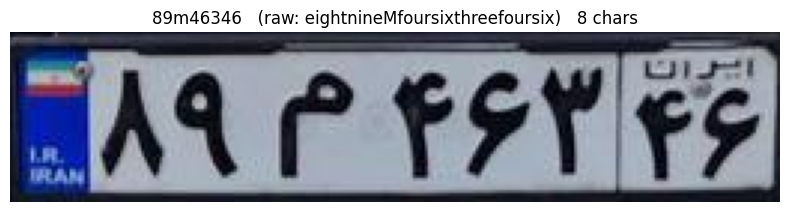

  Raw classes : eightnineMfoursixthreefoursix
  Mapped text : 89m46346
  Final plate : 89m46346
  Char count  : 8
  Plate conf  : 0.763
  → Saved as: test17_plate1_89m46346.jpg

===== Processing: test18.jpg =====


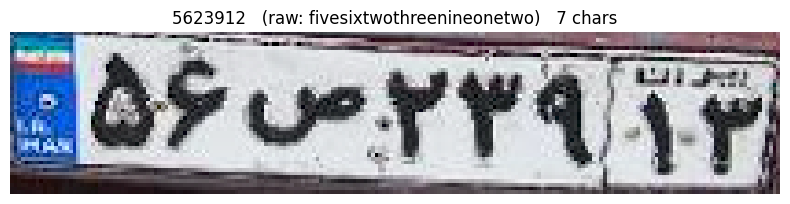

  Raw classes : fivesixtwothreenineonetwo
  Mapped text : 5623912
  Final plate : 5623912
  Char count  : 7
  Plate conf  : 0.689
  → Saved as: test18_plate1_5623912.jpg

===== Processing: test19.jpg =====


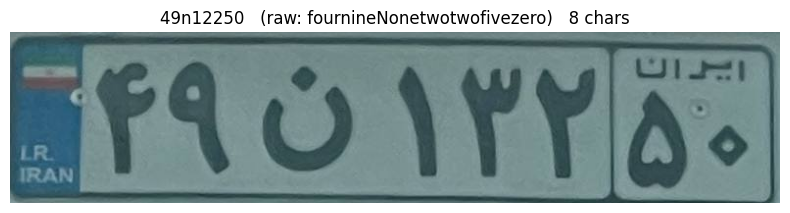

  Raw classes : fournineNonetwotwofivezero
  Mapped text : 49n12250
  Final plate : 49n12250
  Char count  : 8
  Plate conf  : 0.671
  → Saved as: test19_plate1_49n12250.jpg

Processing complete ✓



In [55]:
import cv2
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# ************************************************************************************************************************************************
# ─── Configuration ──────────────────────────────────────────────────────────────
PLATE_MODEL = "models/best.pt"
CHAR_MODEL = "models/plate.pt"

CONF_PLATE = 0.55
CONF_CHAR = 0.25

CROP_DIR = Path("plate_crops")
CROP_DIR.mkdir(parents=True, exist_ok=True)

IMAGES = [
    "photos/test8.jpg",
    # "photos/test16.jpg",
    "photos/test17.jpg",
    "photos/test18.jpg",  # Add more for testing
    "photos/test19.jpg",
]

# Mapping YOLO class names to actual license plate characters
CLASS_TO_CHAR = {
    # Numbers as words
    'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
    'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9',

    # Persian letters (mapped from your model's class names)
    'Alef': 'alef',
    'Ayn': 'ayn',
    'B': 'b',
    'D': 'd',
    'Gh': 'gh',      # likely represents 'ghaf' (ق)
    'J': 'j',
    # 'Janbaz': 'janbaz',
    'L': 'l',
    'M': 'm',
    'N': 'n',
    'Sad': 'sad',
    'Sin': 'sin',
    'Ta': 'ta',
    'Te': 'te',
    'V': 'v',
    'i': 'y',        # 'i' likely means 'ye' (ی)
}

# Valid characters for Iranian license plates
VALID_CHARS = set('0123456789abcdefghijklmnopqrstuvwxyz')

# ✅ NEW: Preprocess plate crop to improve character detection
def preprocess_plate_crop(crop):
    """
    Enhance plate crop for better character detection.
    Returns a 3-channel BGR image (compatible with YOLO).
    """
    if crop is None or crop.size == 0:
        return crop

    # Convert to grayscale
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

    # Enhance contrast (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    enhanced = clahe.apply(gray)

    # Sharpen (unsharp mask)
    gaussian = cv2.GaussianBlur(enhanced, (0, 0), 2.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, gaussian, -0.5, 0)

    # Convert back to 3-channel BGR
    return cv2.cvtColor(sharpened, cv2.COLOR_GRAY2BGR)

def map_class_names_to_text(class_list):
    result = []
    for cls in class_list:
        char = CLASS_TO_CHAR.get(cls, None)
        if char is not None:
            result.append(char)
    return ''.join(result)

def filter_and_sort_chars(char_detections, min_center_dist_ratio=0.038):
    if not char_detections:
        return []

    with_center = [((box[0] + box[2]) / 2, box, name) for box, name in char_detections]
    with_center.sort(key=lambda x: x[0])

    filtered = []
    last_center = -10000

    if char_detections:
        crop_width = char_detections[0][0][2] - char_detections[0][0][0]
        min_dist = crop_width * min_center_dist_ratio
    else:
        min_dist = 16

    for center_x, box, name in with_center:
        if center_x - last_center >= min_dist:
            filtered.append((box, name))
            last_center = center_x

    return filtered

def main():
    print("Loading models...")
    plate_model = YOLO(PLATE_MODEL)
    char_model = YOLO(CHAR_MODEL)

    for img_str in IMAGES:
        img_path = Path(img_str)
        if not img_path.exists():
            print(f"File not found: {img_path}")
            continue

        print(f"\n===== Processing: {img_path.name} =====")

        results = plate_model(img_path, verbose=False)[0]
        img = cv2.imread(str(img_path))
        if img is None:
            print("Failed to read image!")
            continue

        plates = [b for b in results.boxes if float(b.conf) >= CONF_PLATE]
        if not plates:
            print("No plate detected with sufficient confidence.")
            continue

        for i, box in enumerate(plates, 1):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf)

            crop = img[y1:y2, x1:x2]
            if crop.shape[0] < 35 or crop.shape[1] < 90:
                print(f"Plate {i} too small → skipped")
                continue

            # ✅ Apply preprocessing
            processed_crop = preprocess_plate_crop(crop)

            # Save temporary crop (now using PREPROCESSED image for char detection)
            name = f"{img_path.stem}_plate{i}_c{int(conf*100):03d}.jpg"
            temp_path = CROP_DIR / name
            cv2.imwrite(str(temp_path), processed_crop)  # ← Save PREPROCESSED version

            # Detect characters on ENHANCED image
            char_res = char_model(temp_path, verbose=False)[0]

            chars = []
            for b in char_res.boxes:
                if float(b.conf) < CONF_CHAR:
                    continue
                cls_name = char_res.names[int(b.cls)]
                box_xyxy = b.xyxy[0].cpu().numpy().astype(int)
                chars.append((box_xyxy, cls_name))

            if len(chars) < 3:
                print(f"Plate {i} → too few characters ({len(chars)})")
                continue

            filtered_chars = filter_and_sort_chars(chars, min_center_dist_ratio=0.038)
            if len(filtered_chars) < 3:
                print(f"Plate {i} → too few after filtering ({len(filtered_chars)})")
                continue

            class_names = [name for _, name in filtered_chars]
            raw = ''.join(class_names)
            mapped = map_class_names_to_text(class_names)
            final = ''.join(c for c in mapped if c in VALID_CHARS)[:10]  # ← increased to 10

            # Display ORIGINAL crop (for visual consistency)
            plt.figure(figsize=(8, 3))
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))  # ← show original
            plt.axis('off')
            plt.title(f"{final}   (raw: {raw})   {len(filtered_chars)} chars")
            plt.tight_layout()
            plt.show()

            print(f"  Raw classes : {raw}")
            print(f"  Mapped text : {mapped}")
            print(f"  Final plate : {final}")
            print(f"  Char count  : {len(filtered_chars)}")
            print(f"  Plate conf  : {conf:.3f}")

            try:
                safe_final = "".join(c if c.isalnum() else "_" for c in final)
                new_name = f"{img_path.stem}_plate{i}_{safe_final}.jpg"
                # Save ORIGINAL crop with new name (for dataset clarity)
                cv2.imwrite(str(CROP_DIR / new_name), crop)
                temp_path.unlink()  # remove temp preprocessed file
                print(f"  → Saved as: {new_name}")
            except Exception as e:
                print(f"  → Save failed: {e}")

    print("\nProcessing complete ✓\n")

if __name__ == "__main__":
    main()

Loading models...

===== Processing: test8.jpg =====


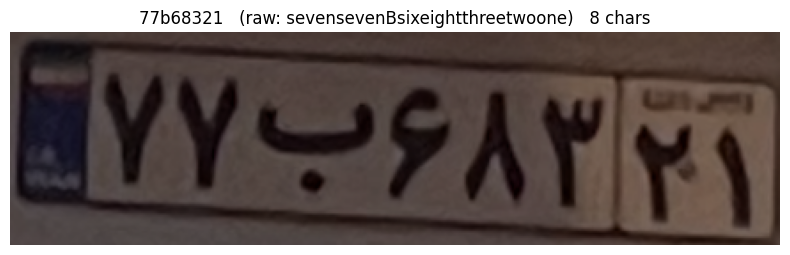

  Raw classes : sevensevenBsixeightthreetwoone
  Mapped text : 77b68321
  Final plate : 77b68321
  Char count  : 8
  Plate conf  : 0.760
  → Saved as: test8_plate1_77b68321.jpg

===== Processing: test17.jpg =====


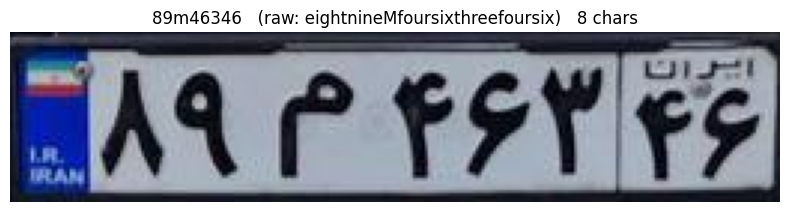

  Raw classes : eightnineMfoursixthreefoursix
  Mapped text : 89m46346
  Final plate : 89m46346
  Char count  : 8
  Plate conf  : 0.763
  → Saved as: test17_plate1_89m46346.jpg

===== Processing: test18.jpg =====


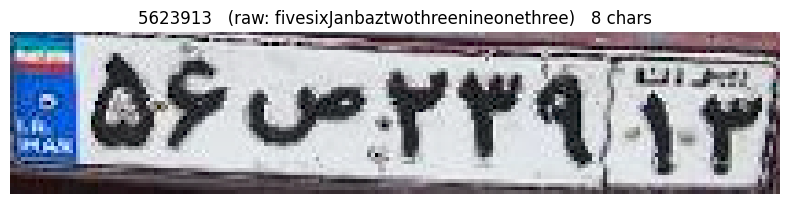

  Raw classes : fivesixJanbaztwothreenineonethree
  Mapped text : 5623913
  Final plate : 5623913
  Char count  : 8
  Plate conf  : 0.689
  → Saved as: test18_plate1_5623913.jpg

===== Processing: test19.jpg =====


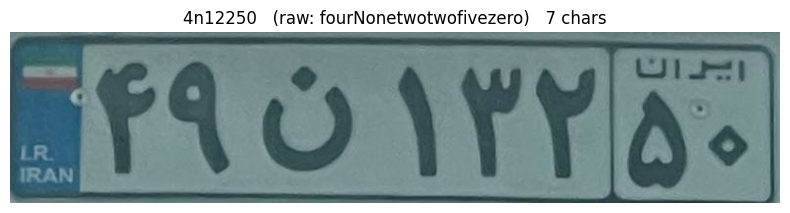

  Raw classes : fourNonetwotwofivezero
  Mapped text : 4n12250
  Final plate : 4n12250
  Char count  : 7
  Plate conf  : 0.671
  → Saved as: test19_plate1_4n12250.jpg

Processing complete ✓



In [58]:
import cv2
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# ************************************************************************************************************************************************
# ─── Configuration ──────────────────────────────────────────────────────────────
PLATE_MODEL = "models/best.pt"
CHAR_MODEL = "models/plate.pt"

CONF_PLATE = 0.55
CONF_CHAR = 0.35  # Lowered to detect faint digits like '9' and '3'

CROP_DIR = Path("plate_crops")
CROP_DIR.mkdir(parents=True, exist_ok=True)

IMAGES = [
    "photos/test8.jpg",
    "photos/test17.jpg",
    "photos/test18.jpg",
    "photos/test19.jpg",
]

# Mapping YOLO class names to readable characters (Latin for simplicity)
CLASS_TO_CHAR = {
    # Numbers as words
    'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
    'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9',

    # Persian letters (mapped from model output)
    'Alef': 'alef',
    'Ayn': 'ayn',
    'B': 'b',
    'D': 'd',
    'Gh': 'gh',
    'J': 'j',
    # 'Janbaz': 'janbaz',
    'L': 'l',
    'M': 'm',
    'N': 'n',
    'Sad': 'sad',
    'Sin': 'sin',
    'Ta': 'ta',
    'Te': 'te',
    'V': 'v',
    'i': 'y',
}

# Valid output characters (Latin representation of Iranian plate)
VALID_CHARS = set('0123456789abcdefghijklmnopqrstuvwxyz')

# ✅ Preprocessing: Grayscale + mild contrast enhancement (no binarization)
def preprocess_plate_crop(crop):
    """
    Convert to grayscale and apply mild CLAHE for better character visibility.
    Returns 3-channel BGR image (required by YOLO).
    """
    if crop is None or crop.size == 0:
        return crop

    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    # Mild CLAHE: avoids over-enhancement
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(6, 6))
    enhanced = clahe.apply(gray)
    # Convert back to 3-channel BGR
    return cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

def map_class_names_to_text(class_list):
    """Convert list of YOLO class names to a clean string using CLASS_TO_CHAR."""
    result = []
    for cls in class_list:
        char = CLASS_TO_CHAR.get(cls, None)
        if char is not None:
            result.append(char)
    return ''.join(result)

def filter_and_sort_chars(char_detections, crop_width, min_center_dist_ratio=0.04):
    """
    Sort characters left-to-right and filter duplicates using real crop width.
    """
    if not char_detections:
        return []

    with_center = [((box[0] + box[2]) / 2, box, name) for box, name in char_detections]
    with_center.sort(key=lambda x: x[0])

    min_dist = crop_width * min_center_dist_ratio
    filtered = []
    last_center = -10000

    for center_x, box, name in with_center:
        if center_x - last_center >= min_dist:
            filtered.append((box, name))
            last_center = center_x

    return filtered

def main():
    print("Loading models...")
    plate_model = YOLO(PLATE_MODEL)
    char_model = YOLO(CHAR_MODEL)

    for img_str in IMAGES:
        img_path = Path(img_str)
        if not img_path.exists():
            print(f"File not found: {img_path}")
            continue

        print(f"\n===== Processing: {img_path.name} =====")

        # Detect license plates
        results = plate_model(img_path, verbose=False)[0]
        img = cv2.imread(str(img_path))
        if img is None:
            print("Failed to read image!")
            continue

        plates = [b for b in results.boxes if float(b.conf) >= CONF_PLATE]
        if not plates:
            print("No plate detected with sufficient confidence.")
            continue

        for i, box in enumerate(plates, 1):
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf)

            crop = img[y1:y2, x1:x2]
            if crop.shape[0] < 35 or crop.shape[1] < 90:
                print(f"Plate {i} too small → skipped")
                continue

            crop_h, crop_w = crop.shape[:2]

            # ✅ Apply preprocessing: grayscale + CLAHE
            processed_crop = preprocess_plate_crop(crop)

            # Save temporary preprocessed image for character model
            temp_path = CROP_DIR / f"{img_path.stem}_plate{i}_temp.jpg"
            cv2.imwrite(str(temp_path), processed_crop)

            # Run character detection on ENHANCED image
            char_res = char_model(temp_path, verbose=False)[0]

            chars = []
            for b in char_res.boxes:
                if float(b.conf) < CONF_CHAR:
                    continue
                cls_name = char_res.names[int(b.cls)]
                box_xyxy = b.xyxy[0].cpu().numpy().astype(int)
                chars.append((box_xyxy, cls_name))

            if len(chars) < 3:
                print(f"Plate {i} → too few characters ({len(chars)})")
                temp_path.unlink(missing_ok=True)
                continue

            # Filter and sort using REAL crop width
            filtered_chars = filter_and_sort_chars(chars, crop_w, min_center_dist_ratio=0.04)

            if len(filtered_chars) < 3:
                print(f"Plate {i} → too few after filtering ({len(filtered_chars)})")
                temp_path.unlink(missing_ok=True)
                continue

            # Convert to final text
            class_names = [name for _, name in filtered_chars]
            raw = ''.join(class_names)
            mapped = map_class_names_to_text(class_names)
            final = ''.join(c for c in mapped if c in VALID_CHARS)[:10]  # Support full plate

            # Display ORIGINAL crop (for visual consistency)
            plt.figure(figsize=(8, 3))
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"{final}   (raw: {raw})   {len(filtered_chars)} chars")
            plt.tight_layout()
            plt.show()

            print(f"  Raw classes : {raw}")
            print(f"  Mapped text : {mapped}")
            print(f"  Final plate : {final}")
            print(f"  Char count  : {len(filtered_chars)}")
            print(f"  Plate conf  : {conf:.3f}")

            # Save ORIGINAL crop with final name
            try:
                safe_final = "".join(c if c.isalnum() else "_" for c in final)
                new_name = f"{img_path.stem}_plate{i}_{safe_final}.jpg"
                final_path = CROP_DIR / new_name
                cv2.imwrite(str(final_path), crop)
                temp_path.unlink(missing_ok=True)  # Clean up temp file
                print(f"  → Saved as: {new_name}")
            except Exception as e:
                print(f"  → Save failed: {e}")
                temp_path.unlink(missing_ok=True)

    print("\nProcessing complete ✓\n")

if __name__ == "__main__":
    main()